<a href="https://colab.research.google.com/github/eehywes/UTS-PDAB/blob/main/UTS_PDAB_Ziyad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTS PDAB - Titanic Dataset
Nama : Muchammad Ziyad Athoiilah
NIM : 2304220036

Notebook ini menjawab soal nomor 1-4 menggunakan dataset Titanic yang telah diunggah.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Eksplorasi Awal

In [3]:
# a. Jumlah total penumpang
total_penumpang = df.shape[0]
print(f"Jumlah total penumpang: {total_penumpang}")

Jumlah total penumpang: 891


Survived
0    549
1    342
Name: count, dtype: int64


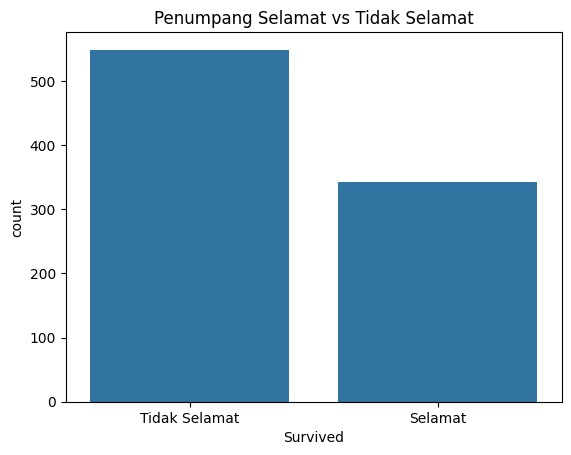

In [4]:
# b. Jumlah penumpang yang selamat dan tidak selamat
print(df['Survived'].value_counts())
sns.countplot(x='Survived', data=df)
plt.xticks([0, 1], ['Tidak Selamat', 'Selamat'])
plt.title('Penumpang Selamat vs Tidak Selamat')
plt.show()

In [5]:
# c. Rata-rata umur, umur termuda, tertua
print(f"Rata-rata umur: {df['Age'].mean()}")
print(f"Umur termuda: {df['Age'].min()}")
print(f"Umur tertua: {df['Age'].max()}")

Rata-rata umur: 29.69911764705882
Umur termuda: 0.42
Umur tertua: 80.0


Sex
male      577
female    314
Name: count, dtype: int64


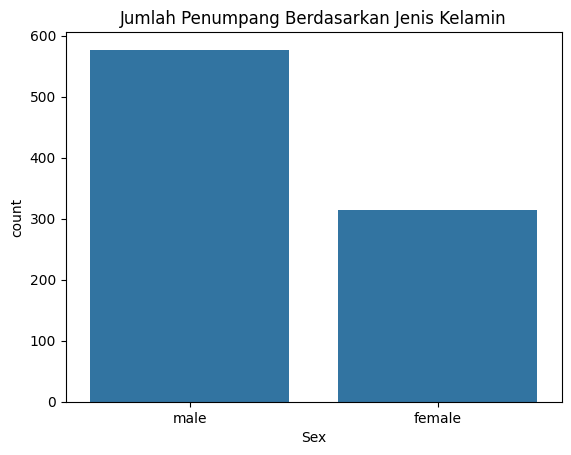

In [6]:
# d. Jumlah penumpang berdasarkan jenis kelamin
print(df['Sex'].value_counts())
sns.countplot(x='Sex', data=df)
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin')
plt.show()

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64


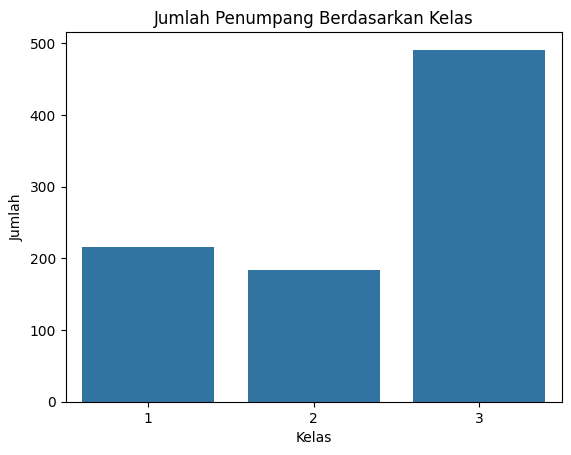

In [7]:
# e. Jumlah penumpang berdasarkan kelas
print(df['Pclass'].value_counts(normalize=True) * 100)
sns.countplot(x='Pclass', data=df)
plt.title('Jumlah Penumpang Berdasarkan Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

## 2. Preprocessing

In [8]:
# a. Cek missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
# b. Tangani missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df.dropna(inplace=True)

<ipython-input-9-113df3d5bf68>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


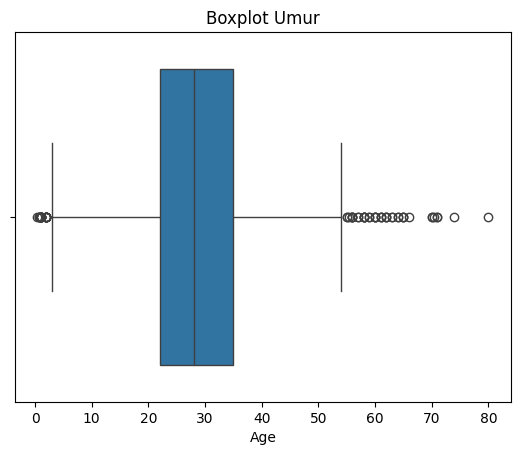

In [10]:
# c. Cek outlier dengan boxplot
sns.boxplot(x=df['Age'])
plt.title("Boxplot Umur")
plt.show()

In [12]:
# d. Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.563674,1,0,A/5 21171,-0.500240,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.669217,1,0,PC 17599,0.788947,C
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.255451,0,0,STON/O2. 3101282,-0.486650,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.438050,1,0,113803,0.422861,S
4,5,0,3,"Allen, Mr. William Henry",male,0.438050,0,0,373450,-0.484133,S


## 3. Modelling

In [14]:
# a. Split data
from sklearn.model_selection import train_test_split

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# c. Model klasifikasi
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"{name} Accuracy: {acc}")

Logistic Regression Accuracy: 0.7865168539325843
Decision Tree Accuracy: 0.7640449438202247
KNN Accuracy: 0.8314606741573034


## 4. Evaluasi

In [16]:
# a. Precision dan Recall
from sklearn.metrics import classification_report

best_model = LogisticRegression()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       109
           1       0.71      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



In [17]:
# b. Berapa banyak yang diprediksi selamat dan benar-benar selamat
import numpy as np

selamat_pred = np.sum(y_pred == 1)
benar_selamat = np.sum((y_pred == 1) & (y_test.values == 1))
print(f'Prediksi selamat: {selamat_pred}')
print(f'Dari prediksi tersebut, benar-benar selamat: {benar_selamat}')

Prediksi selamat: 75
Dari prediksi tersebut, benar-benar selamat: 53
